In [48]:
from sklearn.datasets import load_wine
import pandas as pd

from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,
    GradientBoostingClassifier, VotingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [42]:
X = df.drop('target', axis=1)
y = df['target']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
models = {
    'Bagging (Decision Tree)': BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(random_state=42)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42))
        ],
        voting='hard',
        n_jobs=-1
    )
}

In [46]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

results_df = pd.DataFrame(results).T
display(results_df)


,Accuracy,Precision,Recall,F1-score
Bagging (Decision Tree),0.925926,0.927778,0.925926,0.926295
Random Forest,1.000000,1.000000,1.000000,1.000000
AdaBoost,0.981481,0.982323,0.981481,0.981354
Gradient Boosting,0.907407,0.914983,0.907407,0.906107
Voting Classifier,1.000000,1.000000,1.000000,1.000000


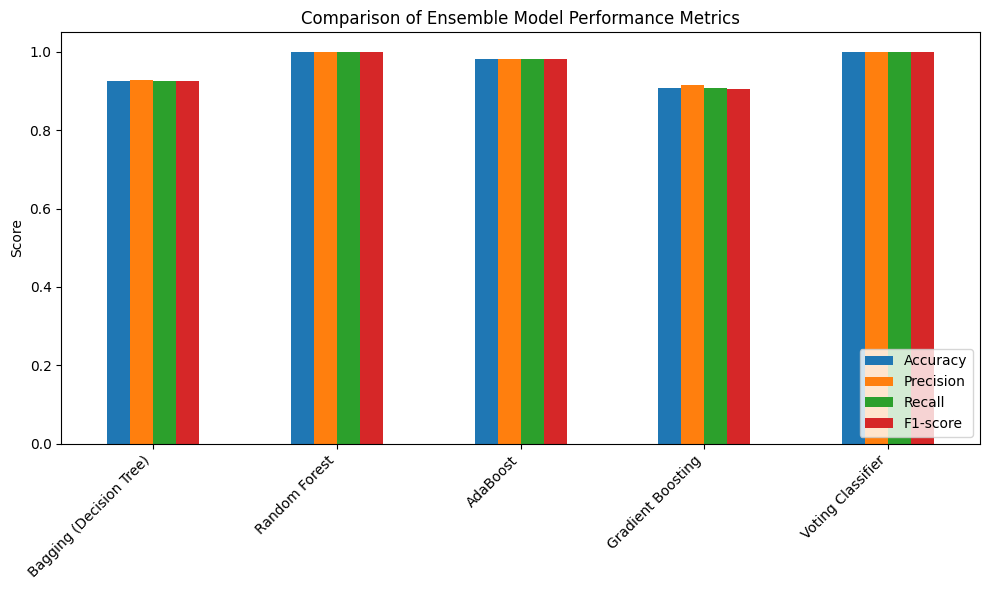

In [50]:
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Ensemble Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()